In [4]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
#Import Dataset

df = pd.read_csv('Housing.csv')

*Preprocessing & Cleaning the Data*

In [6]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
df['bedrooms'].unique()

array([4, 3, 5, 2, 6, 1])

In [10]:
df['bathrooms'].unique()

array([2, 4, 1, 3])

In [11]:
df['area'].unique()

array([ 7420,  8960,  9960,  7500,  8580, 16200,  8100,  5750, 13200,
        6000,  6550,  3500,  7800,  6600,  8500,  4600,  6420,  4320,
        7155,  8050,  4560,  8800,  6540,  8875,  7950,  5500,  7475,
        7000,  4880,  5960,  6840,  7482,  9000,  6360,  6480,  4300,
        7440,  6325,  5150, 11440,  7680,  8880,  6240, 11175,  7700,
       12090,  4000,  5020,  4040,  4260,  6500,  5700, 10500,  3760,
        8250,  6670,  3960,  7410,  5000,  6750,  4800,  7200,  4100,
        6400,  6350,  4500,  5450,  3240,  6615,  8372,  9620,  6800,
        8000,  6900,  3700,  7020,  7231,  6254,  7320,  6525, 15600,
        7160, 11460,  5828,  5200,  5400,  4640,  5800,  6660,  4700,
        5136,  4400,  3300,  3650,  6100,  2817,  7980,  3150,  6210,
        6825,  6710,  6450, 10269,  8400,  5300,  3800,  9800,  8520,
        6050,  7085,  3180,  3410,  3000, 11410,  5720,  3540,  7600,
       10700,  8150,  4410,  7686,  2800,  5948,  4200,  4520,  4095,
        4120,  4770,

In [12]:
df.shape

(545, 13)

In [13]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [14]:
#Check for infinite values

df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [15]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [16]:
df['price'].isnull().sum()

0

In [17]:
df.dropna(subset=['price'], inplace=True)

*Plotting Data for better Understanding*

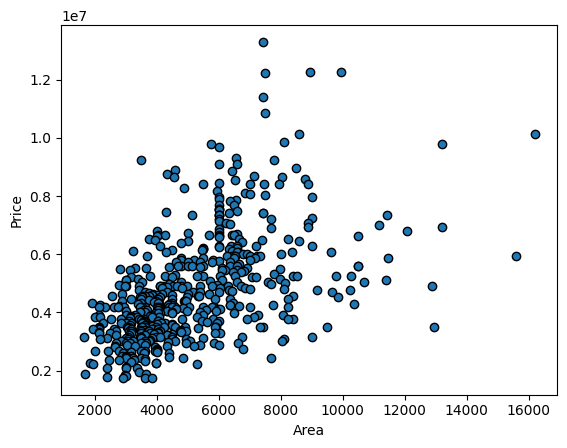

In [18]:
#Scatter Plot for Price and Area

plt.scatter(df['area'], df['price'],  edgecolor='black')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

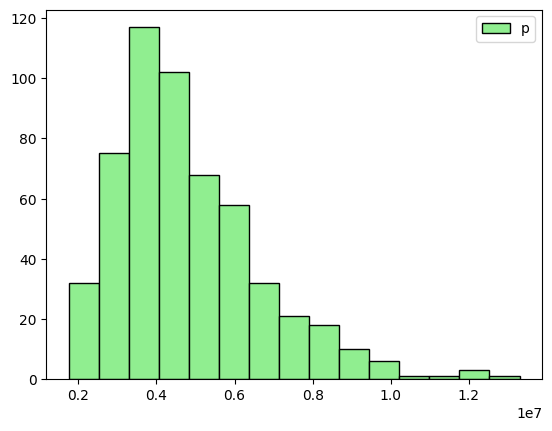

In [19]:
#Distribution Plot

plt.hist(df['price'], color='lightgreen', ec='black', bins=15)
plt.legend('price')
plt.show()

Text(0, 0.5, 'Count')

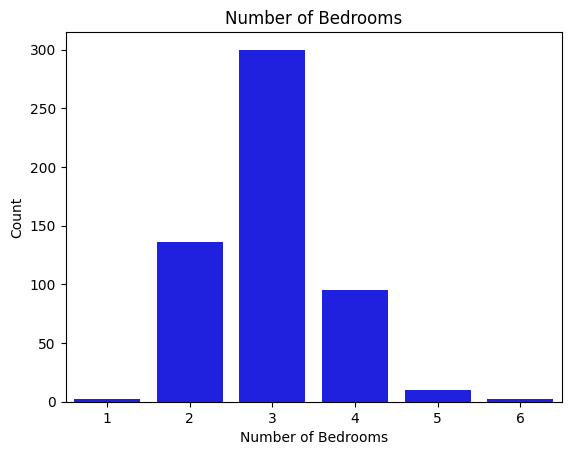

In [20]:
#Count Number of Bedrooms

sns.countplot(x='bedrooms', data=df, color='blue')
plt.title('Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

<ipython-input-21-7e822b8e9942>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'bathrooms', data=df, palette= 'viridis')


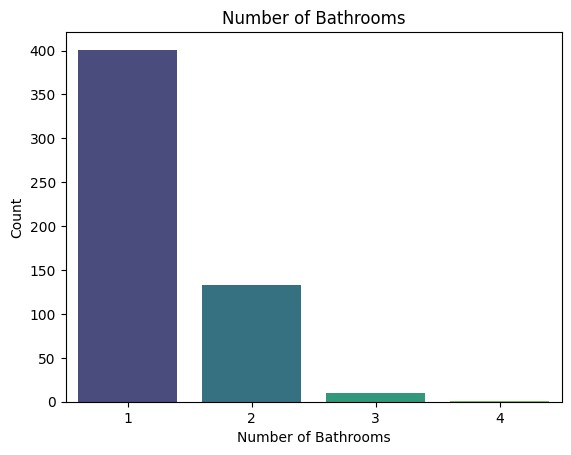

In [21]:
#Count Number of Bathrooms

sns.countplot(x = 'bathrooms', data=df, palette= 'viridis')
plt.title("Number of Bathrooms")
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.show()

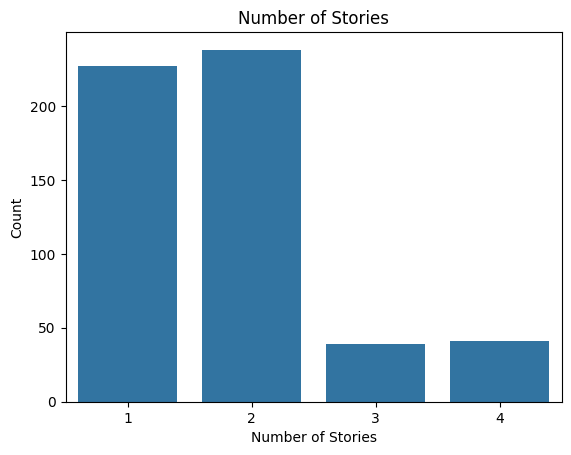

In [22]:
#Count Number of Stories

sns.countplot(x= 'stories', data=df)
plt.title("Number of Stories")
plt.xlabel('Number of Stories')
plt.ylabel('Count')
plt.show()

In [23]:
df = df[['price', 'area', 'bathrooms', 'bedrooms', 'stories']]

In [24]:
x = df[['area', 'bathrooms', 'bedrooms', 'stories']]
y = df[['price']]

In [25]:
x.shape

(545, 4)

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [27]:
model = LinearRegression()

In [28]:
model.fit(x, y)

LinearRegression()

In [29]:
y_predictions = model.predict(xtest)
y_predictions

array([[6216785.78344791],
       [6778099.95613819],
       [3381573.87445222],
       [4476287.82977659],
       [3549467.41415771],
       [4598334.83895734],
       [5282378.81165275],
       [5870963.55280746],
       [3077554.33103204],
       [3070636.63327093],
       [9498621.74552692],
       [3341291.28494905],
       [3259966.05708415],
       [3754241.41415366],
       [4084862.66762311],
       [6356015.30822175],
       [3137919.04790341],
       [4856312.25905182],
       [4799308.59466054],
       [4126421.75583167],
       [5547078.33670739],
       [4638237.40403124],
       [3232984.32260561],
       [4020258.51464632],
       [5179772.21574843],
       [7561389.47225782],
       [3020550.66664076],
       [4916419.44450225],
       [7592488.14983345],
       [3517943.47717863],
       [5296443.87377748],
       [3761841.90273917],
       [6588087.74150057],
       [5090027.28305608],
       [4589077.82723718],
       [5524458.53134261],
       [4341759.18181316],
 

In [30]:
y_predictions.shape

(109, 1)

In [31]:
#Evaluate the Model

mse = mean_squared_error(ytest, y_predictions)
r2 = r2_score(ytest, y_predictions)

print(f"Mean Squared Error : {mse} | R2 Score: {r2}")

Mean Squared Error : 2390695037022.714 | R2 Score: 0.5270230859400014


Mean Squared Error : 2390695037022.714 | R2 Score: 0.5270230859400014
Shape of ytest: (109, 1)
Shape of y_predictions: (109, 1)


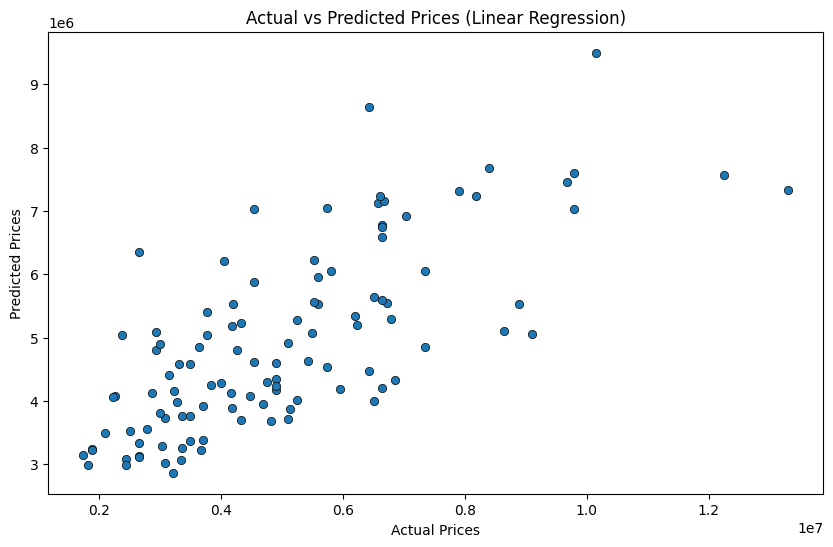

In [32]:
#Evaluate the Model

mse = mean_squared_error(ytest, y_predictions)
r2 = r2_score(ytest, y_predictions)

print(f"Mean Squared Error : {mse} | R2 Score: {r2}")

# Check the shapes of ytest and y_predictions
print("Shape of ytest:", ytest.shape)
print("Shape of y_predictions:", y_predictions.shape)

# Reshape y_predictions if necessary
if y_predictions.ndim > 1:
    y_predictions = y_predictions.ravel()  # Flatten to 1D

# Extract the values from the DataFrame into a NumPy array
ytest_values = ytest.values.ravel() # Extract values and flatten

plt.figure(figsize=(10, 6))
sns.scatterplot(x=ytest_values, y=y_predictions, edgecolor= 'black') # Use the NumPy array for ytest
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.show()

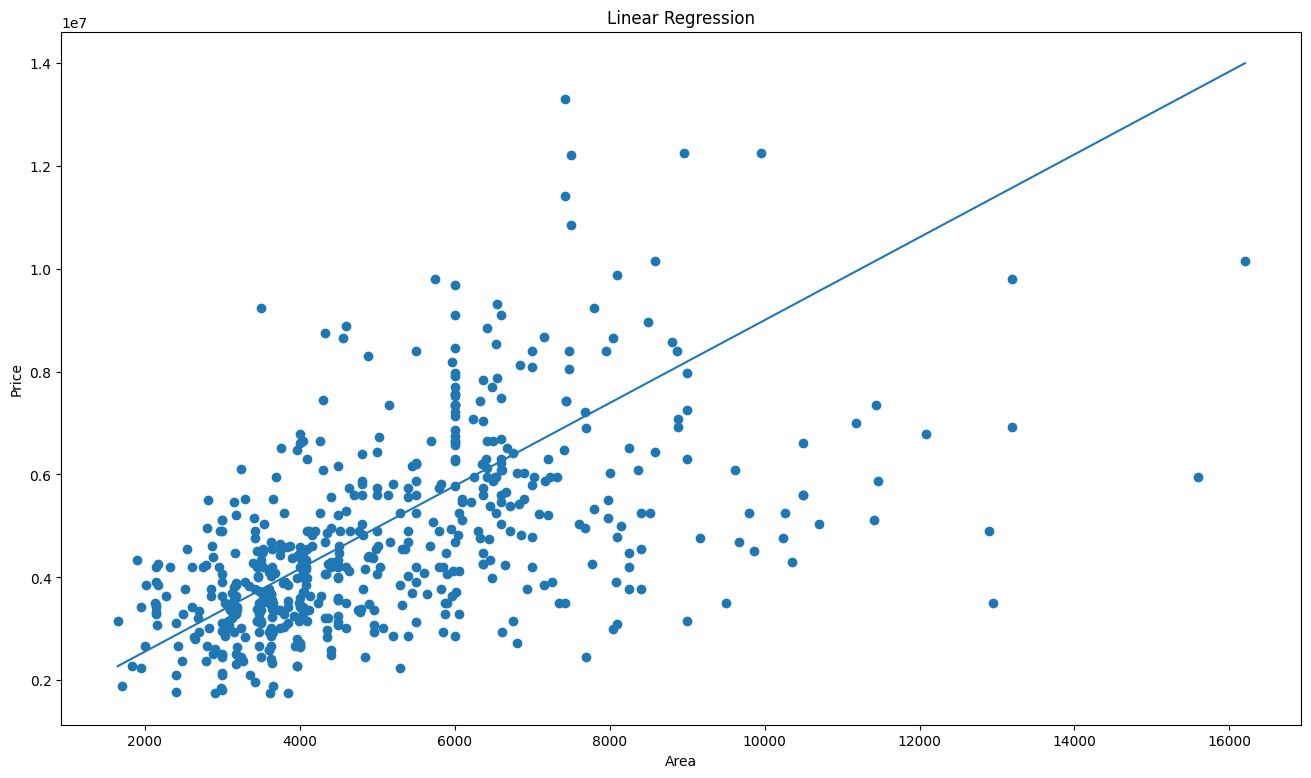

In [33]:
#Plotting Linear Regression

# Assuming 'x' contains the original features used for training
x_new = np.linspace(x.min(), x.max(), 100)

# Create a DataFrame with the same columns as the training data
x_new_df = pd.DataFrame(x_new, columns=x.columns)

y_new = model.predict(x_new_df)

plt.figure(figsize=(16, 9))
ax = plt.axes()
ax.scatter(x.iloc[:, 0], y)  # Assuming the first column of 'x' is what you want to plot against
ax.plot(x_new_df.iloc[:, 0], y_new)  # Plot against the first column of the new data

ax.set_xlabel('Area')
ax.set_ylabel('Price')
plt.title('Linear Regression')
ax.axis('tight')

plt.show()